Taxi-v3 problem using Q-Learning, Deep Q-Learning, Sarse and Policy Gradient

Q-learning:

c:\Users\jonas\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, Total Reward: -1
Episode 0, Total Reward: -11
Episode 0, Total Reward: -12
Episode 0, Total Reward: -13
Episode 0, Total Reward: -14
Episode 0, Total Reward: -24
Episode 0, Total Reward: -25
Episode 0, Total Reward: -35
Episode 0, Total Reward: -36
Episode 0, Total Reward: -37
Episode 0, Total Reward: -38
Episode 0, Total Reward: -48
Episode 0, Total Reward: -49
Episode 0, Total Reward: -59
Episode 0, Total Reward: -69
Episode 0, Total Reward: -79
Episode 0, Total Reward: -80
Episode 0, Total Reward: -81
Episode 0, Total Reward: -82
Episode 0, Total Reward: -83
Episode 0, Total Reward: -84
Episode 0, Total Reward: -85
Episode 0, Total Reward: -86
Episode 0, Total Reward: -96
Episode 0, Total Reward: -106
Episode 0, Total Reward: -107
Episode 0, Total Reward: -108
Episode 0, Total Reward: -118
Episode 0, Total Reward: -119
Episode 0, Total Reward: -120
Episode 0, Total Reward: -121
Episode 0, Total Reward: -122
Episode 0, Total Reward: -123
Episode 0, Total Reward: -124
Episo

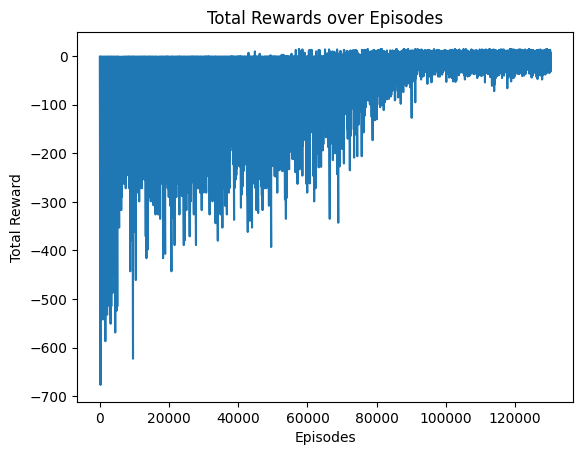

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Taxi-v3', render_mode="rgb_array") # , render_mode="human"
env.action_space.seed(42)

# Hyperparameters
alpha = 0.1 # Learning rate
gamma = 0.99 # Discount factor
epsilon = 1 # Exploration

# Q-table init
n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))
rewards = []

# Training loop
episodes = 4000

for episode in range(episodes):
    observation, info = env.reset() # Make sure environment is reset before every run
    done = False
    total_reward = 0

    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample() # Take a random action aka explore
        else:
            action = np.argmax(q_table[observation]) # Take the best action aka exploit

        next_observation, reward, terminated, truncated, info = env.step(action)

        # Updating the Q-table (state is observation)
        best_next_action = np.max(q_table[next_observation])
        q_table[observation, action] = q_table[observation, action] + \
            alpha * (reward + gamma * best_next_action - q_table[observation, action])
        
        # Update observation
        observation = next_observation

        total_reward += reward
        rewards.append(total_reward)

        epsilon = max(0.1, epsilon * 0.995)

        if episode % 1000 == 0:
            print(f'Episode {episode}, Total Reward: {total_reward}')

        done = terminated or truncated

plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()


env.close()

Deep Q-learning

In [ ]:
import gym

env = gym.make('Taxi-v3', render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in range(1000):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())

    if terminated or truncated:
        observation, info = env.reset()

env.close()

Sarse

In [ ]:
import gym

env = gym.make('Taxi-v3', render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in range(1000):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())

    if terminated or truncated:
        observation, info = env.reset()

env.close()

Policy Gradient

In [ ]:
import gym

env = gym.make('Taxi-v3', render_mode="human")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in range(1000):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())

    if terminated or truncated:
        observation, info = env.reset()

env.close()